In [1]:
# loading data via pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# loading data from URL and converting into dataframe
df = pd.read_csv('http://13.234.66.67/summer19/datasets/bank.csv')

In [3]:
# schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# top 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


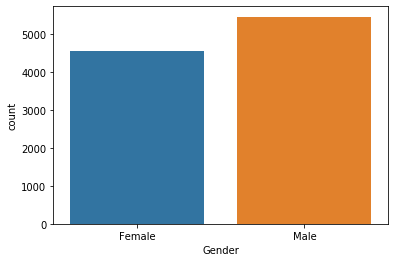

In [5]:
# countplot by seaborn
sb.countplot(df['Gender'])

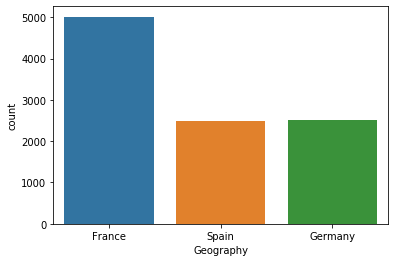

In [6]:
# compare Countries
sb.countplot(df['Geography'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb85b190f60>,
      dtype=object)

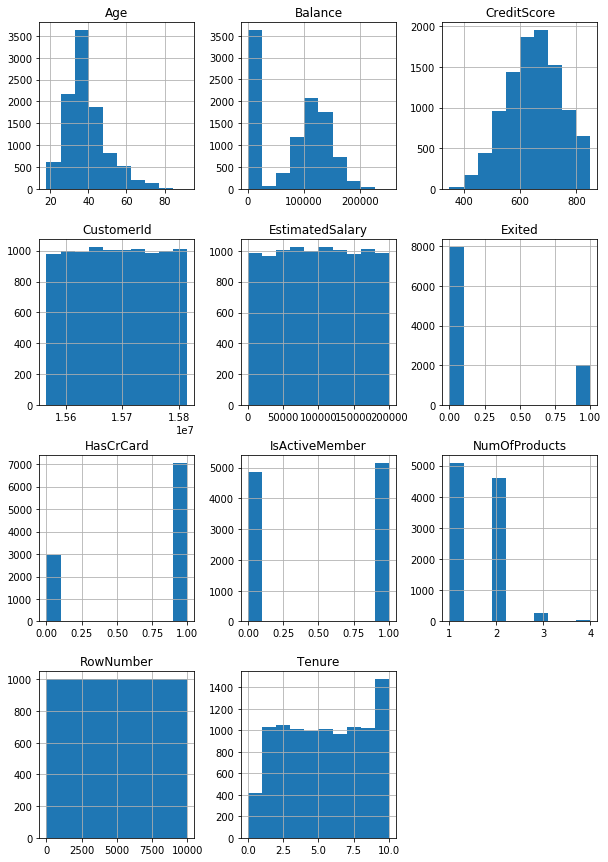

In [7]:
# `histogram
df.hist(figsize=(10,15))

In [8]:
# features and label of data
features=df.iloc[0:,3:13].values

In [9]:
features

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [10]:
# bank exit status that is label
label=df.iloc[:,13].values

In [11]:
label

array([1, 0, 1, ..., 1, 1, 0])

In [12]:
# to convert string data into numeric we can apply label encoding
from sklearn.preprocessing import LabelEncoder

In [13]:
countenc=LabelEncoder()  # function call

In [14]:
features[:,1]=countenc.fit_transform(features[:,1])

In [15]:
# same for gender
features[:,2]=countenc.fit_transform(features[:,2])

In [16]:
# dummy variables using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [17]:
# calling function
counthot=OneHotEncoder(categorical_features=[1])

In [18]:
# fit and Transform
features=counthot.fit_transform(features).toarray()
features1=features[:,1:]

/home/sj/.local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/sj/.local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [19]:
features1.shape

(10000, 11)

In [20]:
# training and testing
from sklearn.model_selection import train_test_split

In [21]:
X,x,Y,y=train_test_split(features1,label,test_size=0.2)

In [22]:
# feature Scaling
from sklearn.preprocessing import  StandardScaler

In [23]:
sc=StandardScaler()

In [24]:
# training data scale
X=sc.fit_transform(X)

In [25]:
# testing data transform
x=sc.transform(x)

In [26]:
#X
x.shape

(2000, 11)

#  Now we can create ANN model

In [27]:
import keras # this is the way of using tensorflow in background

Using TensorFlow backend.


In [28]:
# keras ANN model library import
from keras.models import Sequential

In [29]:
# filling data in each layer --
from keras.layers import Dense
# this will give the method to decide activation function and number of nodes in each layer
# including inout, hidden and output layer

In [30]:
# now we can design Model
model= Sequential()

W0708 15:40:30.302835 140430763484992 deprecation_wrapper.py:119] From /home/sj/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [35]:
# now we can web add input layer
model.add(Dense(6,input_shape=(11,),activation="relu"))
# relu -- means rectifier activation functuina


In [37]:
# adding one more hidden laye
model.add(Dense(6,activation='relu'))
# now we don't have to assign numbers of inputs after first/ input layer

In [38]:
# final layer adding
model.add(Dense(1,activation='sigmoid'))

In [50]:
# compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
# optimizer -- weight adjust method -- stochitis g d (adam)

In [51]:
# training data fit 
model.fit(X,Y,batch_size=200,epochs=100)

Epoch 1/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.3235 - acc: 0.8682
Epoch 2/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3233 - acc: 0.8669
Epoch 3/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3229 - acc: 0.8676
Epoch 4/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3231 - acc: 0.8672
Epoch 5/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3233 - acc: 0.8674
Epoch 6/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3230 - acc: 0.8672
Epoch 7/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3233 - acc: 0.8676
Epoch 8/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3232 - acc: 0.8678
Epoch 9/100
8000/8000 [==============================] - 0s 8us/step - loss: 0.3229 - acc: 0.8678
Epoch 10/100
8000/8000 [==============================] - 0s 5us/step - loss: 0.3230 - acc: 0.8678
Epoch 11/100
8000/

8000/8000 [==============================] - 0s 6us/step - loss: 0.3224 - acc: 0.8671
Epoch 84/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3220 - acc: 0.8668
Epoch 85/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3221 - acc: 0.8673
Epoch 86/100
8000/8000 [==============================] - 0s 5us/step - loss: 0.3224 - acc: 0.8674
Epoch 87/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3221 - acc: 0.8677
Epoch 88/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3221 - acc: 0.8680
Epoch 89/100
8000/8000 [==============================] - 0s 5us/step - loss: 0.3221 - acc: 0.8676
Epoch 90/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3220 - acc: 0.8676
Epoch 91/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3221 - acc: 0.8680
Epoch 92/100
8000/8000 [==============================] - 0s 6us/step - loss: 0.3221 - acc: 0.8680
Epoch 93/100
8000/8000 

In [53]:
model.predict(x)

array([[0.05116278],
       [0.09055185],
       [0.39589024],
       ...,
       [0.32624885],
       [0.09520891],
       [0.12209076]], dtype=float32)

In [ ]:
# accuracy score -- confusion matrix
